In [191]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [192]:
from collections import Counter

## 디올

In [193]:
mag_d = pd.read_csv('./magazine/final/magazine_d_stickword.csv', sep ='|', encoding = 'utf-8')

In [194]:
mag_d

,magazine,brand,title,link,date,word_dior,ADFN,ADFN_2
0,A,D,빈티지 쇼핑의 시대,http://www.allurekorea.com/2020/10/27/%eb%b9%8...,2020-10-27,"['그러니 빈티지 패션은, 어쩌면 나도 좋고 너도 좋은 일이다. 당시 사랑했던, 지...","['빈티지', '패션', '좋', '느', '좋', '당시', '사랑', '사랑',...","['빈티지', '패션', '좋', '느', '좋', '당시', '사랑', '사랑',..."
1,A,D,"주식을 시작한 패션 에디터의 이야기, 나는 주주다",http://www.allurekorea.com/2020/10/16/%ec%a3%b...,2020-10-16,[' 요즘 들어 주식은 친구들과의 대화에서 빼놓을 수 없는 주제가 되었다. 코로나...,"['요즘', '주식', '친구', '과의', '대화', '빼놓', '주제', '코로...","['요즘', '주식', '친구', '과의', '대화', '빼놓', '주제', '코로..."
2,A,D,거리로 나온 하이패션 슈즈들 4,http://www.allurekorea.com/2020/09/16/%eb%a6%a...,2020-09-16,"[""['나이키의 조던 시리즈들 중에서도 역대급으로 평가받는 ‘에어 디올’은 부르는 ...","['나이', '조', '덜', '시리즈', '역대', '급', '평가', '에어',...","['나이', '조', '덜', '시리즈', '역대', '급', '평가', '에어',..."
3,A,D,차정원부터 아이린까지. 옷 잘입는 셀럽들의 사복 패션에 등장한 뉴 백은 무엇?,http://www.allurekorea.com/2020/08/13/%ec%b0%a...,2020-08-13,['디올 레이디 디올 디올아무르 미니백 5백만원대'],"['DIOR', 'LADY', 'DIOR', 'DIOR', '아무르', '미니']","['DIOR', 'LADY', 'DIOR', 'DIOR', '아무르', '미니']"
4,A,D,DON’T CATEGORIZE ME / 유태오,http://www.allurekorea.com/2020/05/28/dont-cat...,2020-05-28,['실크 슬리브리스와 블랙 와이드 팬츠는 김서룡 옴므. 블랙 부츠는 보테가 베네타....,"['실크', '슬리브리스', '블랙', '와이드', '팬츠', '김', '룡', '...","['실크', '슬리브리스', '블랙', '와이드', '팬츠', '김', '룡', '..."
...,...,...,...,...,...,...,...,...
1754,W,D,가을의 하이킹,http://www.wkorea.com/2016/09/05/%ea%b0%80%ec%...,2016-09-05,['6. 주얼 장식과 앙증맞은 리본이 반전의 매력을 더하는 부츠는 디올 제품. 1백...,"['얼', '장식', '앙증맞', '리본', '반전', '매력', '부츠', 'DI...","['얼', '장식', '앙증맞', '리본', '반전', '매력', '부츠', 'DI..."
1755,W,D,W해시태그,http://www.wkorea.com/2016/09/02/w%ed%95%b4%ec...,2016-09-02,"['#W뷰티콕 (뷰티 디렉터 송시은)\\n조회 2,023회\\n너무나 뜨거운 여름...","['W', '뷰티', '콕', '뷰티', '디렉터', '송', '시은', '조회',...","['W', '뷰티', '콕', '뷰티', '디렉터', '송', '시은', '조회',..."
1756,W,D,마법의 색,http://www.wkorea.com/2016/09/02/%eb%a7%88%eb%...,2016-09-02,"[""'크리스찬 디올에게 초록은 곧 ‘자연’을, 빨강은 ‘생명’을, 분홍은 ‘감미로움...","['CHRISTIAN', 'DIOR', '초록', '자연', '빨강', '생명', ...","['CHRISTIAN', 'DIOR', '초록', '자연', '빨강', '생명', ..."
1757,W,D,따로 또 같이,http://www.wkorea.com/2016/09/02/%eb%94%b0%eb%...,2016-09-02,"['자수 장식 슈트, 실크 셔츠에 리본 타이를 연출한 구찌, 남성다운 검정 테일러드...","['자수', '장식', '슈트', '실크', '셔츠', '리본', '타이', '남성...","['자수', '장식', '슈트', '실크', '셔츠', '리본', '타이', '남성..."


In [195]:
mag_d['word'] = mag_d['word_dior']

In [196]:
mag_D = mag_d[['magazine', 'brand', 'title', 'word', 'ADFN', 'ADFN_2']]

In [197]:
len(mag_D)

1759

### 5

In [198]:
idx5 = []
for i in range(len(mag_D)):
    if i % 5 == 0 :
        idx5.append(i)

In [199]:
mag_D5 = mag_D.loc[idx5]

In [200]:
mag_D5.reset_index(drop = True, inplace = True)

In [201]:
len(mag_D5)

352

### 6

In [202]:
idx6 = []
for i in range(len(mag_D)):
    if i % 6 == 0 :
        idx6.append(i)

In [203]:
mag_D6 = mag_D.loc[idx6]

In [204]:
mag_D6.reset_index(drop = True, inplace = True)

In [205]:
len(mag_D6)

294

### 8

In [354]:
idx8 = []
for i in range(len(mag_D)):
    if i % 8 == 0 :
        idx8.append(i)

In [358]:
mag_D8 = mag_D.loc[idx8]

In [359]:
mag_D8.reset_index(drop = True, inplace = True)

In [360]:
len(mag_D8)

220

### 9

In [409]:
idx9 = []
for i in range(len(mag_D)):
    if i % 9 == 0 :
        idx9.append(i)

In [410]:
mag_D9 = mag_D.loc[idx9]

In [411]:
mag_D9.reset_index(drop = True, inplace = True)

In [412]:
len(mag_D9)

196

## 로제

### 로제 (유튜브 + 매거진)

In [206]:
tot_r = pd.read_csv('./tot_rose_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [207]:
tot_r['word'] = tot_r['word_rose']

In [208]:
tot_R = tot_r[['magazine', 'brand', 'title', 'word', 'ADFN', 'ADFN_2']]

In [209]:
len(tot_R)

140

### 디올 + 로제

In [432]:
D9R = pd.concat([mag_D9, tot_R])

In [433]:
D9R.reset_index(drop = True, inplace = True)

In [434]:
D9R.to_csv('./magazine/final/D9R.csv', sep = '|', encoding = 'utf-8', index = False)

In [435]:
len(D9R)

336

In [450]:
for word in D8R['ADFN_2']:
    if "朴彩瑛" in word:
        print(word)
        print('-'*50)

In [437]:
# 우아
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace("elegance", "우아")
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace("'우아하고'", "우아")
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace("'우아한", "우아")

In [438]:
# 귀엽다
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace("'귀엽'", "귀엽다")
# 귀엽다
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace("'귀여운'", "귀엽다")

In [439]:
# 하이틴
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace("'하이', '틴'", "하이틴")

In [440]:
# 프리티
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace("'프리', '티'", "프리티")
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace("'푸리', '티'", "프리티")

# 프리티
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace("'스포', '티'", "스포티")

In [441]:
# 비주얼
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace("'비주'", "비주얼")

In [442]:
# 퀸
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace("'QUINN'", "퀸")
# 퀸
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace("'QUEEN'", "퀸")


In [443]:
# 최고
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace("'BEST'", "최고")
# 최고
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace("'최고다'", "최고")
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace("'원', '탑'", "원탑")

In [444]:
# 인간
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace("'MISSSAINTLAURENT'", "'인간', 'LAURENT'")
# 인간
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace("'HUMAN'", "'인간'")

In [445]:
# 디자인
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace("'DESIGN'", "디자인")
# 이모지
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace("'♡'", "")
# 인플루언서
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace("'INFLUENCER'", "인플루언서")
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace("'CREATIVE'", "크리에이티브")

# 드
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace("'데이즈', '드'", "데이즈드")
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace("'레이어', '드'", "레이어드")
# 로제
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace("朴彩英哭戏", "로제")
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace("朴彩瑛", "로제")
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace("PARKCHAEYOUNG", "로제")

In [446]:
# 최고
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace("'YSL'", "LAURENT")

In [447]:
# 최고
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace("'LOVE'", "사랑")

In [448]:
# 새롭
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace("'새롭'", "새로운")

In [449]:
# 존재감
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace("'존재', '감'", "존재감")
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace("'볼륨', '감'", "볼륨감")

## stopword 추가

In [451]:
sw_df = pd.read_csv('stopwords.csv', header=None)

In [452]:
sw_df.columns = ['stopword']

In [453]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [454]:
print(len(stop_words))
print(type(stop_words))

675
<class 'list'>


In [455]:
stop_words[-10:]

['둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [456]:
add_0 = ['진짜', '존나', '보고', '그냥', '카이', '이광수', '광수', '런닝맨', '❤️', '없는', '유재석', '❤', '♥', '♡', '♡','♡',
         '있고', '거', 
         '내', '더', '개', '사람', '영상', '광고', '언니', '말', '뭐', '수', '생각', '아는', 
        '있는', '정말', '같은', '같음', '듯', '♡', '완전', '같아', '정도', '지금', '역시', '뭔가', '입니다', '때문', '아니라',
         '함', '같은데', '해', '하는', '할', '넘', '한', '안', '했다', '보면', '데', '하고', '하면', '게', '해서', '봐도', 
         '한다', '된', '건', '요', '움', '임', '애', '하는거', '해도', '보는', '이제', '했는데', '하는데', '하는게', '같아요', 
         '합니다', '하지', '하게', '되는', 'I', '는', '난', '서', '도', '줄', '위', '분', '알', '은', '두', '번', '뒤',
         '이건', '없다', '있어요', '아니고', '있어', 
        '계속', '원래', '뭘', '못', '후', '이름', '속', '욕', '옆', '하네', '아님', '그런', '된다', '있음',
        '같', '돼', 'you', '제품', '표현', 'n', '봤는데', '건가', '나오는', '가지', '저런', '보이', '고',
        '중', '사진', '댓글', '부분', '진심', '그녀', '보', '날', '겁나', '요즘', '앞', '워', '이유', '솔직히', '하며', '통해',
        '모든', '항상', '전', '기자', '다시', '오늘', '↑', '이자', '대해',
        '링', '한편', '️⃣',
        '람쥐', '아닌가', '도민준', '없네', '이수근', '아이유', 'our', '젠', '였다면', '올해', '미우', 'The', 'my', '이란',
        '그게', '같고', '아니다', '아닌데', '있지',  '만큼', '백예린', '같네', 'we', '있게', '덕분', '있어서', '든', '썸넬',
        '라서', '여서', '라면', '인지', 'a','와중', '하자', '이후', '해야', '예전', '막',
        '없어', '왜케', 'You', 'THE', 'your', 'u', 'AN', '수가',
        'MUCH', 'FORTIFFANYANDCO', 'TIFFANYANDCO', 'ahh', 'her', 'knew', '않고', '보니', '없음',
        '옴', '같아서', '있었는데', '그거', '땐', '음', '받고' ,'드러내', '어떡해', '나중', '와우', '아주', '나온', '보여',
         '없는데', 'i', 'm', 'all', '편집',  '글', '알았는데', 'this', '위해', '보임', '헐', '짜', 'A', 'be']
for w in add_0:
    stop_words.append(w)

In [457]:
add_1 = ['BLACKPINK', '리사', '지수', '제니']
for w in add_1:
    stop_words.append(w)

In [458]:
add_2 = []
for w in add_1:
    stop_words.append(w)

In [459]:
len(stop_words)

920

In [460]:
D9R['ADFN_2'] = D9R['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace('"', '').str.replace("'", "").str.split(', ')

In [461]:
noun_adj_list = []
for i in range(len(D9R)):
    for word in D9R.loc[i, 'ADFN_2']:
        if word not in stop_words:
            noun_adj_list.append(word)

In [462]:
word = Counter(noun_adj_list)
print(word.most_common(200))

[('로제', 9279), ('예쁘다', 1383), ('귀엽다', 1067), ('사랑', 739), ('노래', 700), ('목소리', 639), ('DIOR', 524), ('음색', 481), ('최고', 467), ('솔로', 399), ('음악', 314), ('무대', 313), ('챙', 311), ('머리', 257), ('춤', 257), ('패션', 249), ('매력', 244), ('느낌', 234), ('LAURENT', 226), ('레전드', 213), ('아이돌', 209), ('처음', 178), ('금발', 177), ('직캠', 175), ('코첼라', 173), ('머리카락', 169), ('여자', 167), ('인간', 165), ('바람', 150), ('영어', 139), ('컬렉션', 138), ('여신', 138), ('공주', 131), ('스타일', 130), ('쇼', 127), ('브랜드', 125), ('창법', 124), ('드레스', 123), ('입덕', 117), ('love', 116), ('춤선', 115), ('영화', 114), ('몸매', 113), ('컬러', 109), ('한국', 107), ('가수', 107), ('여성', 101), ('분위기', 101), ('모델', 99), ('티', 94), ('퀸', 93), ('연기', 85), ('디자이너', 85), ('찰떡', 84), ('실력', 83), ('대박', 83), ('배우', 81), ('스타', 81), ('블랙', 79), ('발음', 78), ('봄', 77), ('백', 76), ('짱', 76), ('명품', 75), ('라이브', 75), ('룩', 74), ('하우스', 71), ('애교', 71), ('작품', 70), ('재킷', 68), ('세계', 67), ('소리', 66), ('멋있다', 66), ('보컬', 66), ('BLINK', 65), ('라인', 64), ('장', 64), ('디자

In [463]:
count = Counter(noun_adj_list)

In [464]:
word_list = count.most_common(500)
for v in word_list:
    print(v)

('로제', 9279)
('예쁘다', 1383)
('귀엽다', 1067)
('사랑', 739)
('노래', 700)
('목소리', 639)
('DIOR', 524)
('음색', 481)
('최고', 467)
('솔로', 399)
('음악', 314)
('무대', 313)
('챙', 311)
('머리', 257)
('춤', 257)
('패션', 249)
('매력', 244)
('느낌', 234)
('LAURENT', 226)
('레전드', 213)
('아이돌', 209)
('처음', 178)
('금발', 177)
('직캠', 175)
('코첼라', 173)
('머리카락', 169)
('여자', 167)
('인간', 165)
('바람', 150)
('영어', 139)
('컬렉션', 138)
('여신', 138)
('공주', 131)
('스타일', 130)
('쇼', 127)
('브랜드', 125)
('창법', 124)
('드레스', 123)
('입덕', 117)
('love', 116)
('춤선', 115)
('영화', 114)
('몸매', 113)
('컬러', 109)
('한국', 107)
('가수', 107)
('여성', 101)
('분위기', 101)
('모델', 99)
('티', 94)
('퀸', 93)
('연기', 85)
('디자이너', 85)
('찰떡', 84)
('실력', 83)
('대박', 83)
('배우', 81)
('스타', 81)
('블랙', 79)
('발음', 78)
('봄', 77)
('백', 76)
('짱', 76)
('명품', 75)
('라이브', 75)
('룩', 74)
('하우스', 71)
('애교', 71)
('작품', 70)
('재킷', 68)
('세계', 67)
('소리', 66)
('멋있다', 66)
('보컬', 66)
('BLINK', 65)
('라인', 64)
('장', 64)
('디자인', 64)
('요정', 64)
('천사', 64)
('시즌', 63)
('헤어', 63)
('MARIA', 63)
('미모', 63)
(

In [465]:
top500 = pd.DataFrame(word_list)

In [466]:
top500.columns = ['word', 'count']

In [467]:
top500.to_csv('./D9R_top500.csv', sep='|', encoding = 'utf-8', index = False)

## 워드클라우드 만들기

In [468]:
import matplotlib.pyplot as plt

In [469]:
import matplotlib.font_manager as fm

# 이용 가능한 폰트 중 '고딕'만 선별
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Yu Gothic C:\WINDOWS\Fonts\YuGothB.ttc
HYGothic-Extra C:\WINDOWS\Fonts\H2GTRE.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framdit.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Yu Gothic C:\WINDOWS\Fonts\YuGothR.ttc
MS Gothic C:\WINDOWS\Fonts\msgothic.ttc
HYGothic-Medium C:\WINDOWS\Fonts\H2GTRM.TTF
Malgun Gothic C:\WINDOWS\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Century Gothic C:\WINDOWS\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framd.ttf


In [470]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### 워드클라우드 그리기

In [471]:
from wordcloud import WordCloud

In [472]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

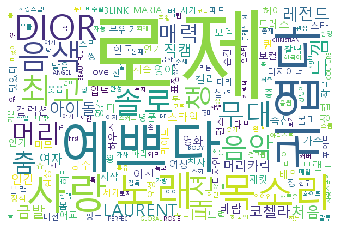

In [473]:
wc.generate_from_frequencies(dict(word_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('wc_D9R_top500.png')

In [474]:
D9R.to_csv('./magazine/final/D9R_adfn_2.csv', sep='|', encoding = 'utf-8', index = False)

In [408]:
D8R.to_csv('./magazine/final/D8R_adfn_2.csv', sep='|', encoding = 'utf-8', index = False)